# Wine dataset, Gradient Boosting and Gaussian Naive Bayes Classifiers


In [1]:
# Import libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.datasets
import seaborn as sn 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

In [2]:
wine_dtset = sklearn.datasets.load_wine() # Import the dataset

In [3]:
print("Dataset explanation : {}".format(wine_dtset["DESCR"])) # Provide a description of the dataset

Dataset explanation : .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinit

In [4]:
# Provide data and targets 

print("Data: {}".format(wine_dtset["data"]))
print("Targets: {}".format(wine_dtset["target"]))

Data: [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
Targets: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


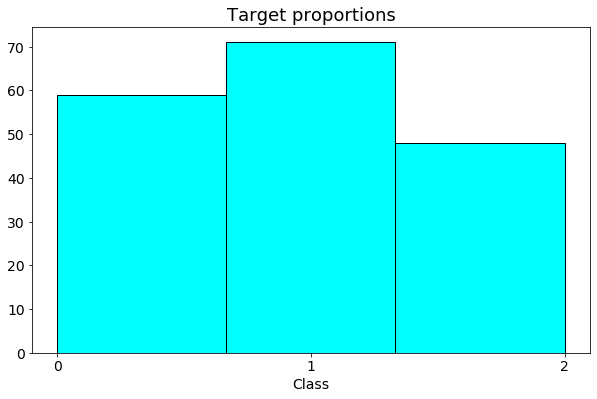

Proportion of the class 0: 33.15 %
Proportion of the class 1: 39.89 %
Proportion of the class 2: 26.97 %


In [5]:
# Make a histogram of the classes in the dataset 

fig = plt.figure(figsize = (10,6))

plt.hist(wine_dtset["target"], 3, color="cyan", edgecolor="black")
plt.xlabel("Class", fontsize = 14)
plt.xticks(np.arange(0,3, step = 1), fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Target proportions", fontsize = 18)
plt.show()

prop0 = 100*list(wine_dtset["target"]).count(0)/len(list(wine_dtset["target"]))
prop1 = 100*list(wine_dtset["target"]).count(1)/len(list(wine_dtset["target"]))
prop2 = 100*list(wine_dtset["target"]).count(2)/len(list(wine_dtset["target"]))

print("Proportion of the class 0: {} %".format(round(prop0, 2)))
print("Proportion of the class 1: {} %".format(round(prop1, 2)))
print("Proportion of the class 2: {} %".format(round(prop2, 2)))

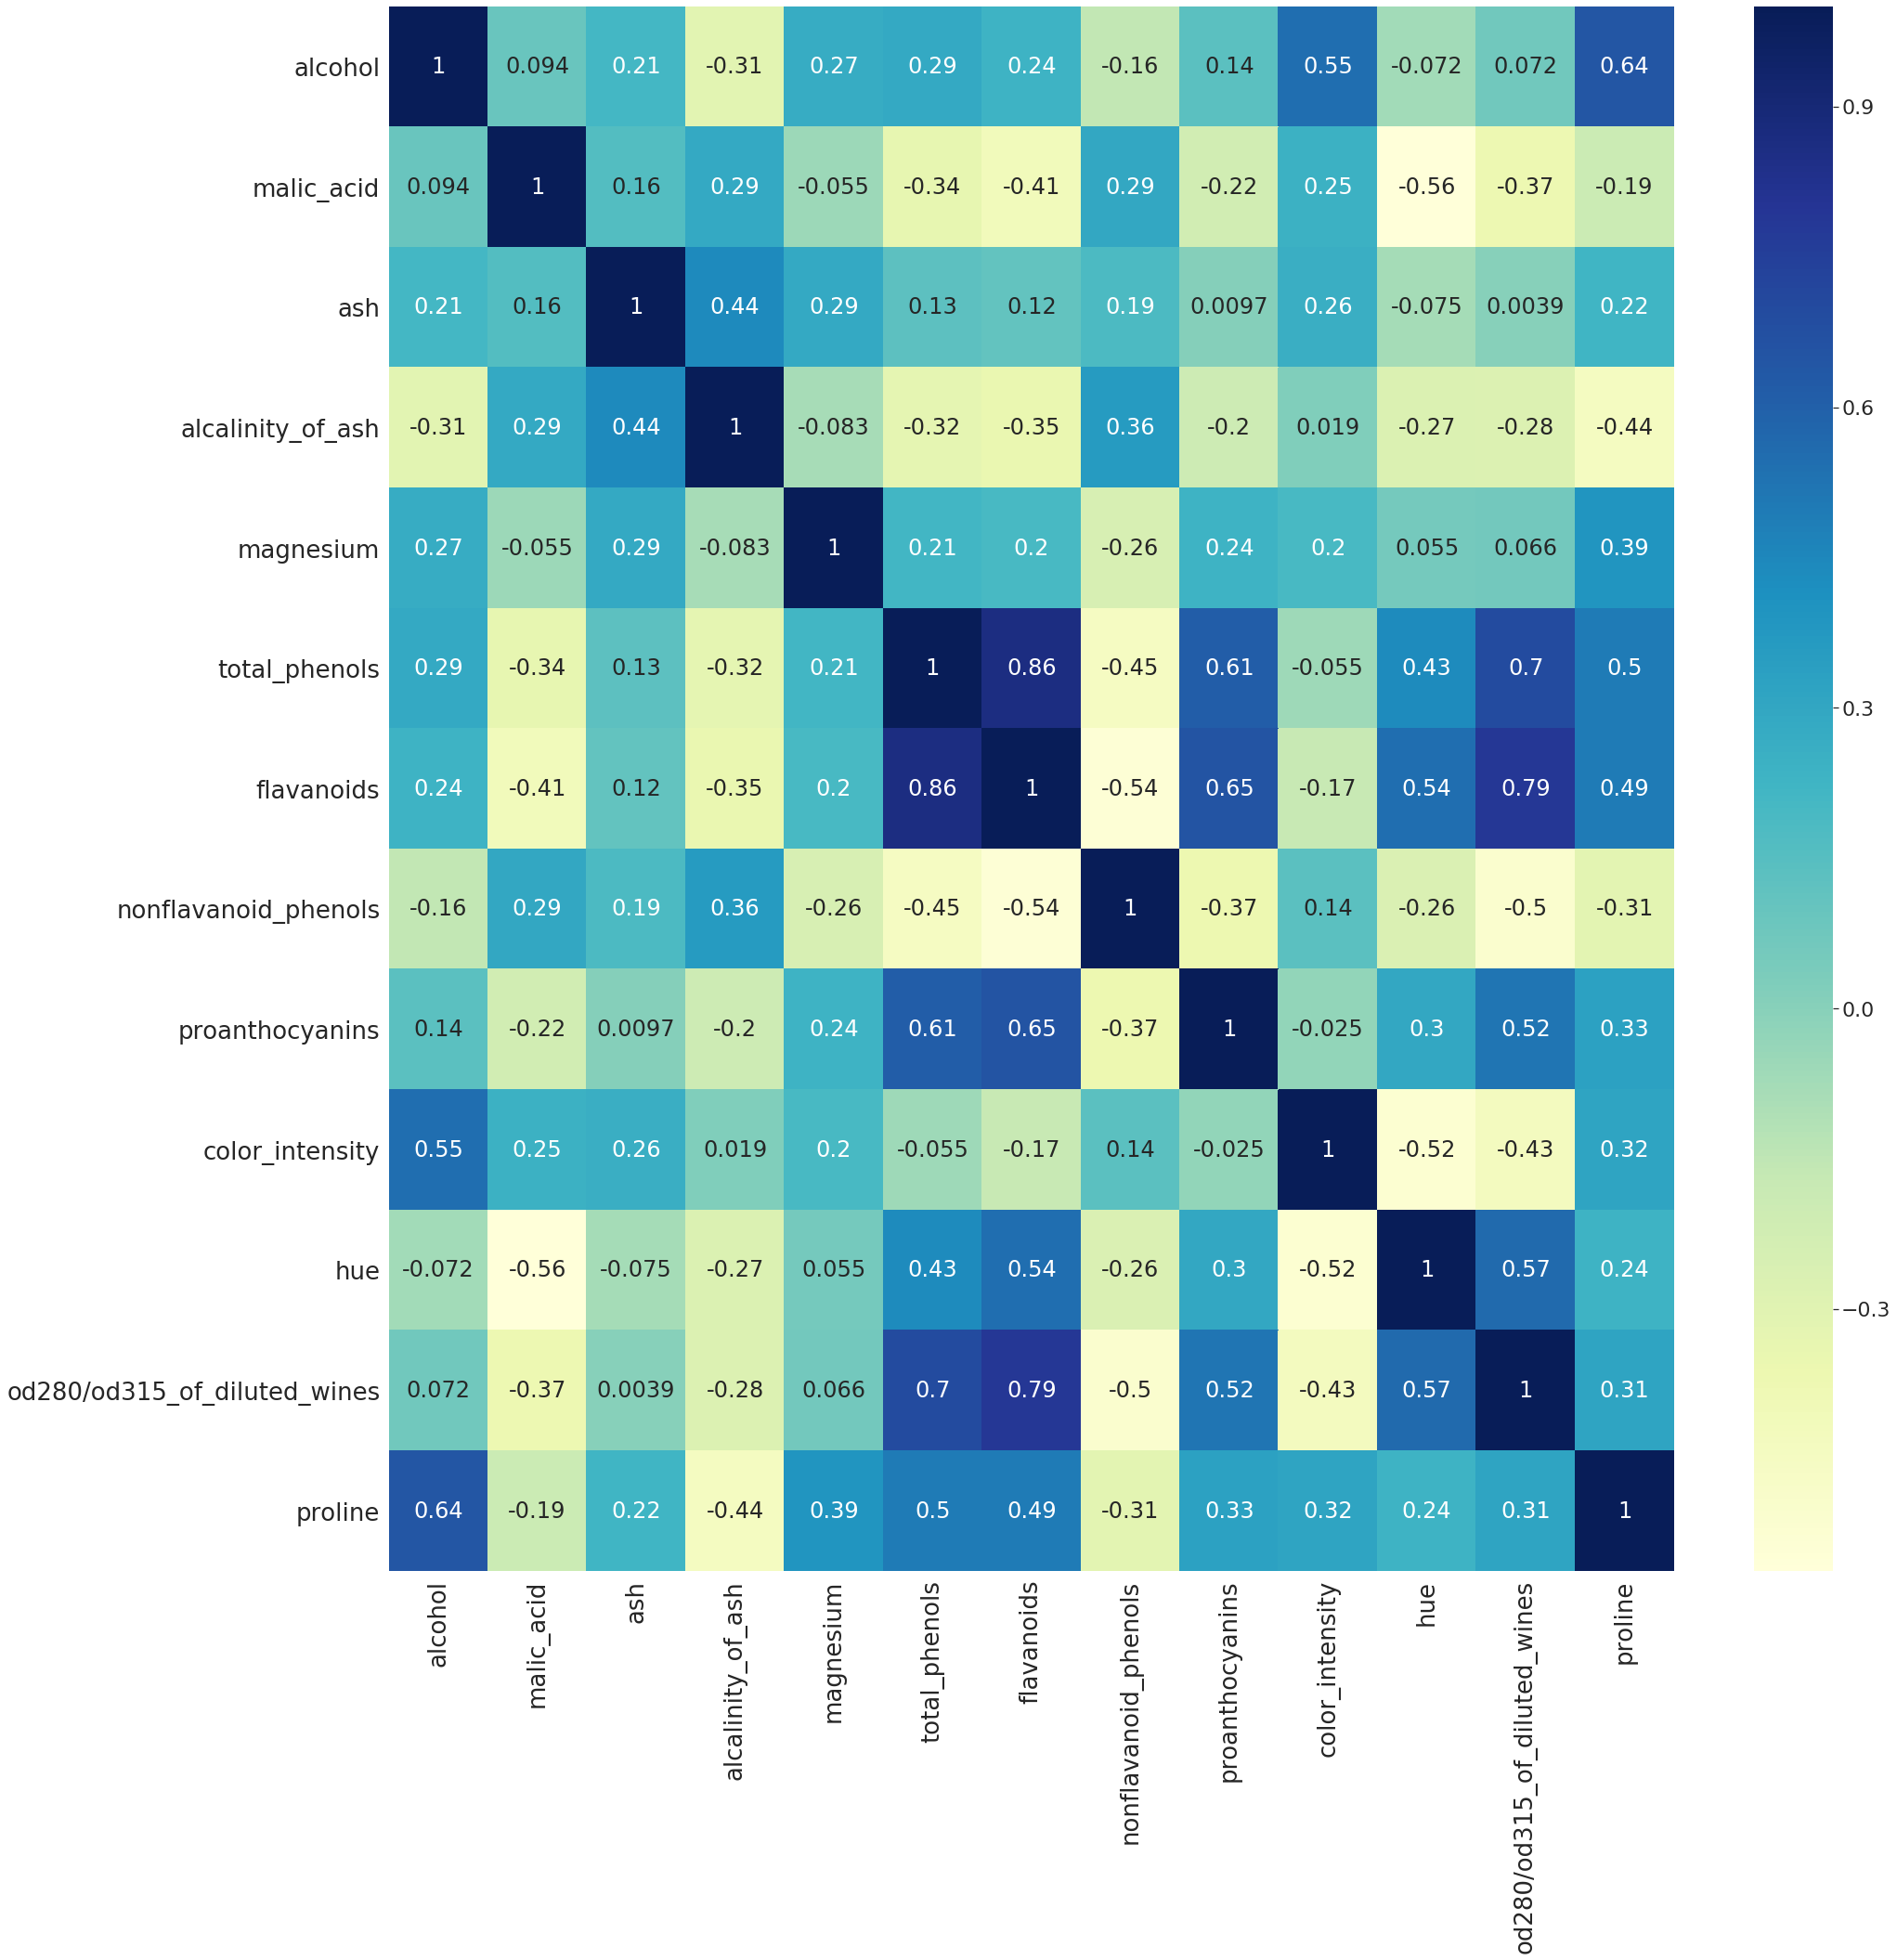

In [6]:
# convert dataset into a Pandas dataframe

wine = pd.DataFrame(wine_dtset["data"], columns = wine_dtset["feature_names"])

# compute the correlation matrix of the dataset

plt.figure(figsize = (31,31))
sn.set(font_scale = 2)
sn.heatmap(wine.corr(method = "pearson"), annot = True, cmap="YlGnBu")
plt.tick_params(labelsize=26)
plt.show()


In [7]:
# Scale the features

feat_scaled = StandardScaler().fit_transform(wine_dtset["data"])


In [8]:
# Split into training and test set

x_train, x_test, y_train, y_test = train_test_split(feat_scaled, wine_dtset["target"], test_size = 1/3, random_state = 1)

In [9]:
# Define the Gradient Boosting classifier model

grad_class = GradientBoostingClassifier(n_estimators = 200, max_depth = 5, criterion = "mae")

np.random.seed(0)
grad_class.fit(x_train, y_train)
print("Mean accuracy on the test set (Gradient Boosting Classifier): {} %".format(round(100*grad_class.score(x_test, y_test)),2))

Mean accuracy on the test set (Gradient Boosting Classifier): 100.0 %


In [10]:
# Print the model predictions

preds_grad = grad_class.predict(x_test)

In [11]:
# Get the confusion matrix and the F1 score

print("Confusion matrix: {}".format(confusion_matrix(y_test, preds_grad)))
print("F1-score: {}".format(f1_score(y_test, preds_grad, average = "micro")))

Confusion matrix: [[24  0  0]
 [ 0 23  0]
 [ 0  0 13]]
F1-score: 1.0


In [12]:
# Apply the gradient boosting classifier within cross validation 
# The previous result may depend on the particular split of the whole dataset into training and test set

avg_acc_grad = np.mean(cross_val_score(grad_class, feat_scaled, wine_dtset["target"], cv = 10))
print("Mean accuracy on the full dataset (Gradient Boosting classifier, cross validation): {} %".format(100*round(avg_acc_grad,2)))

Mean accuracy on the full dataset (Gradient Boosting classifier, cross validation): 95.0 %


In [13]:
# Fit the whole dataset

grad_class.fit(feat_scaled, wine_dtset["target"])
print("Accuracy on the full dataset: {} %".format(100*round(grad_class.score(feat_scaled, wine_dtset["target"]),2)))

Accuracy on the full dataset: 100.0 %


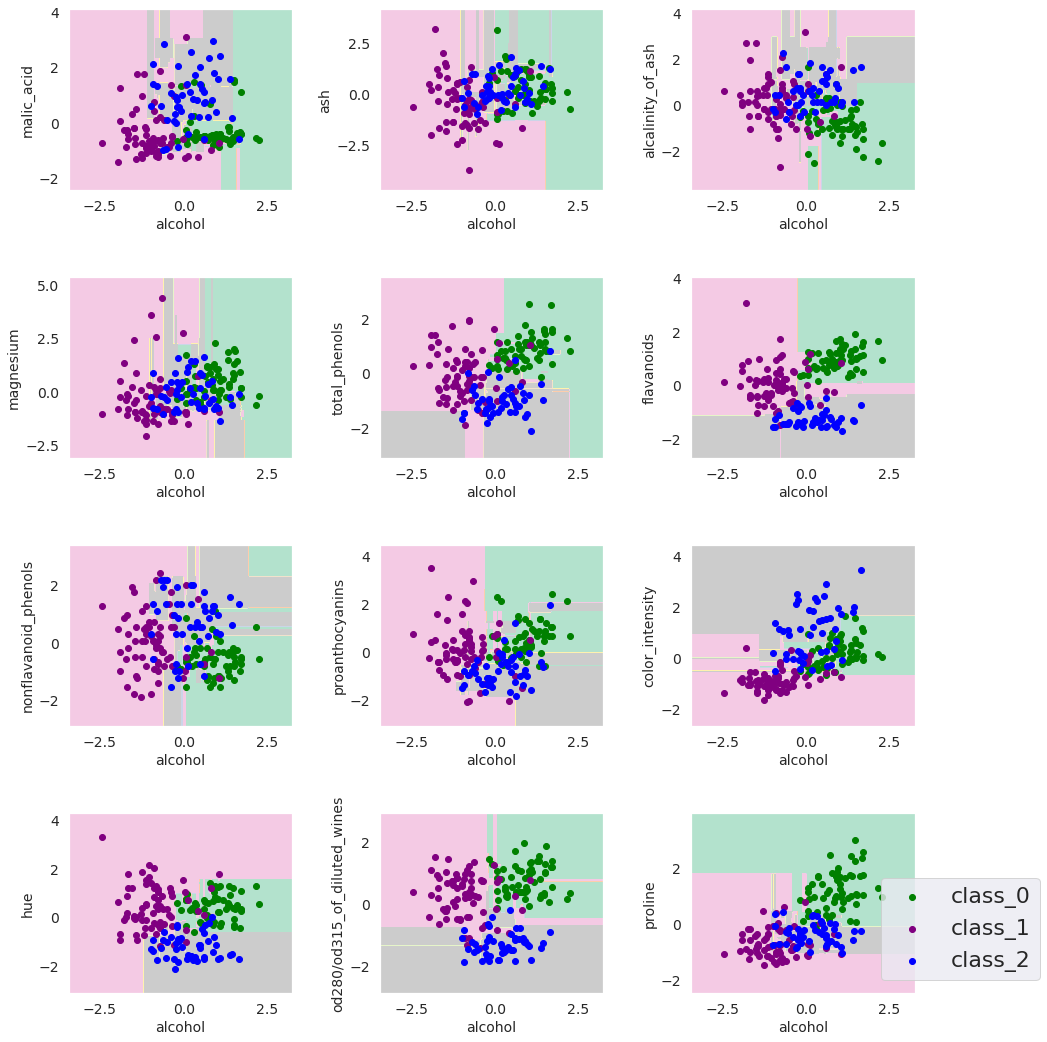

In [14]:
# Plot the decision boundary of the Gradient Boosting Classifier

n_classes = 3
plot_colors = ["green", "purple", "blue"] # Colours used to plot the points
plot_step = 0.02


ft_pairs = [[0,1], [0,2], [0,3], [0,4], [0,5], [0,6], [0,7], [0,8], [0,9], [0,10], [0,11], [0,12]]

fig = plt.figure(figsize = (15,15))

for pairidx, pair in enumerate(ft_pairs):

    X = wine_dtset.data[:, pair]
    y = wine_dtset.target
    
    X = StandardScaler().fit_transform(X)
    grad_class.fit(X, y)
    

    plt.subplot(4, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

    Z = grad_class.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel2)

    plt.xlabel(wine_dtset.feature_names[pair[0]], fontsize = 14)
    plt.ylabel(wine_dtset.feature_names[pair[1]], fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine_dtset.target_names[i])

    plt.axis("tight")

plt.legend(loc = "best", bbox_to_anchor=(0.8, 0.2, 0.6, 0.5))
plt.tight_layout()
plt.show()

Some points are misclassified in the previous boundary graphs, despite the accuracy on the whole dataset is 100%. However, this results was obtained when all of the features are used to fit the model. On the other hand, the boundary graphs are drawn taking into account just single **pairs of features** and not the whole dataset. Let us check how much the classification accuracy decreases if we train the model just on the first pair of features.

In [15]:
X = wine_dtset.data[:, [0,2]]
y = wine_dtset.target
    
X = StandardScaler().fit_transform(X)
grad_class.fit(X, y)
print("Classification accuracy using only the first two features: {} %".format(round(100*grad_class.score(X, y),2)))

Classification accuracy using only the first two features: 95.51 %


In [16]:
# Define the Gaussian Naive Bayes classifier

gauss_mod = GaussianNB()
gauss_mod.fit(x_train, y_train)
print("Mean accuracy on the test set (Gaussian Naive Bayes): {} %".format(round(100*gauss_mod.score(x_test, y_test),2)))

Mean accuracy on the test set (Gaussian Naive Bayes): 96.67 %


In [17]:
# Get the model predictions 

preds_gauss = gauss_mod.predict(x_test)

In [18]:
print("Confusion matrix: {}".format(confusion_matrix(y_test, preds_gauss))) # Confusion matrix
print("F1-score: {}".format(f1_score(y_test, preds_gauss, average = "micro"))) # F1-score of the model 

Confusion matrix: [[24  0  0]
 [ 2 21  0]
 [ 0  0 13]]
F1-score: 0.9666666666666667


In [19]:
# Use the model with cross validation 

avg_acc_NB = np.mean(cross_val_score(gauss_mod, feat_scaled, wine_dtset["target"], cv = 10))
print("Mean accuracy on the full dataset (Gaussian Naive Bayes, cross validation): {} %".format(100*round(avg_acc_NB,2)))

Mean accuracy on the full dataset (Gaussian Naive Bayes, cross validation): 98.0 %


In [20]:
# Fit the whole dataset

gauss_mod.fit(feat_scaled, wine_dtset["target"])
print("Accuracy on the full dataset: {} %".format(100*round(gauss_mod.score(feat_scaled, wine_dtset["target"]),2)))
preds_gauss = gauss_mod.predict(feat_scaled) # Get the model predictions

Accuracy on the full dataset: 99.0 %


In [21]:
pred_gauss = pd.DataFrame(preds_gauss, columns = ["Predictions"]) # Dataframe with the predictions
targets = pd.DataFrame(wine_dtset["target"], columns = ["Class"]) # Dataframe with the actual targets
total_dt = pd.concat([wine, targets, pred_gauss], axis = 1) # Concatenate the two datasets 
total_dt.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class,Predictions
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


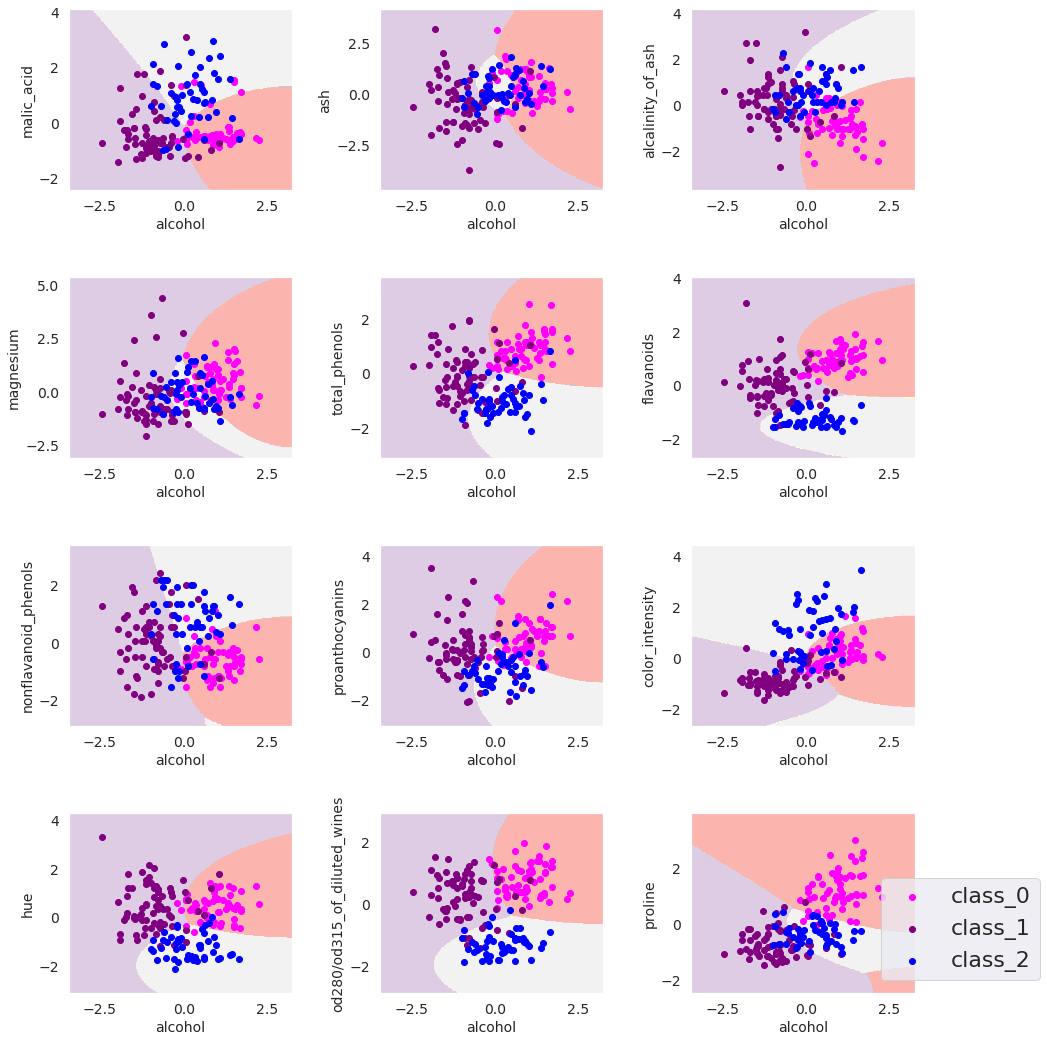

In [22]:
# Plot the decision boundary of the Naive Bayes Classifier

n_classes = 3
plot_colors = ["magenta", "purple", "blue"] # Colours used to plot the points
plot_step = 0.02


ft_pairs = [[0,1], [0,2], [0,3], [0,4], [0,5], [0,6], [0,7], [0,8], [0,9], [0,10], [0,11], [0,12]]

fig = plt.figure(figsize = (15,15))

for pairidx, pair in enumerate(ft_pairs):

    X = wine_dtset.data[:, pair]
    y = wine_dtset.target
    
    X = StandardScaler().fit_transform(X)
    gauss_mod.fit(X, y)
    

    plt.subplot(4, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

    Z = gauss_mod.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    plt.xlabel(wine_dtset.feature_names[pair[0]], fontsize = 14)
    plt.ylabel(wine_dtset.feature_names[pair[1]], fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine_dtset.target_names[i])

    plt.axis("tight")

plt.legend(loc = "best", bbox_to_anchor=(0.8, 0.2, 0.6, 0.5))
plt.tight_layout()
plt.show()

In [23]:
# Select the best support vector classifier 

def svc_param_selection(X, y, nfolds):
    kernels = ["rbf", "sigmoid"]
    Cs = [0.001, 0.01, 0.1, 1, 10, 1e+2, 1e+3, 1e+4, 1e+5]
    gammas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e+1,1]
    param_grid = {'kernel': kernels, 'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    pred_targets = grid_search.predict(X)
    return (grid_search.best_params_, round(grid_search.best_score_,2), confusion_matrix(y, pred_targets),
           f1_score(y, pred_targets, average = "micro"))

In [24]:
print("Parameters of the best model: {}".format(svc_param_selection(feat_scaled, np.ravel(wine_dtset["target"]), 10)[0]))
print("Mean accuracy of the best model: {} %".format(svc_param_selection(feat_scaled, np.ravel(wine_dtset["target"]), 10)[1]*100))
print("Confusion matrix: {}".format(svc_param_selection(feat_scaled, np.ravel(wine_dtset["target"]), 10)[2]))
print("F-measure: {}".format(svc_param_selection(feat_scaled, np.ravel(wine_dtset["target"]), 10)[3]))

Parameters of the best model: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean accuracy of the best model: 98.0 %
Confusion matrix: [[59  0  0]
 [ 0 70  1]
 [ 0  0 48]]
F-measure: 0.9943820224719101


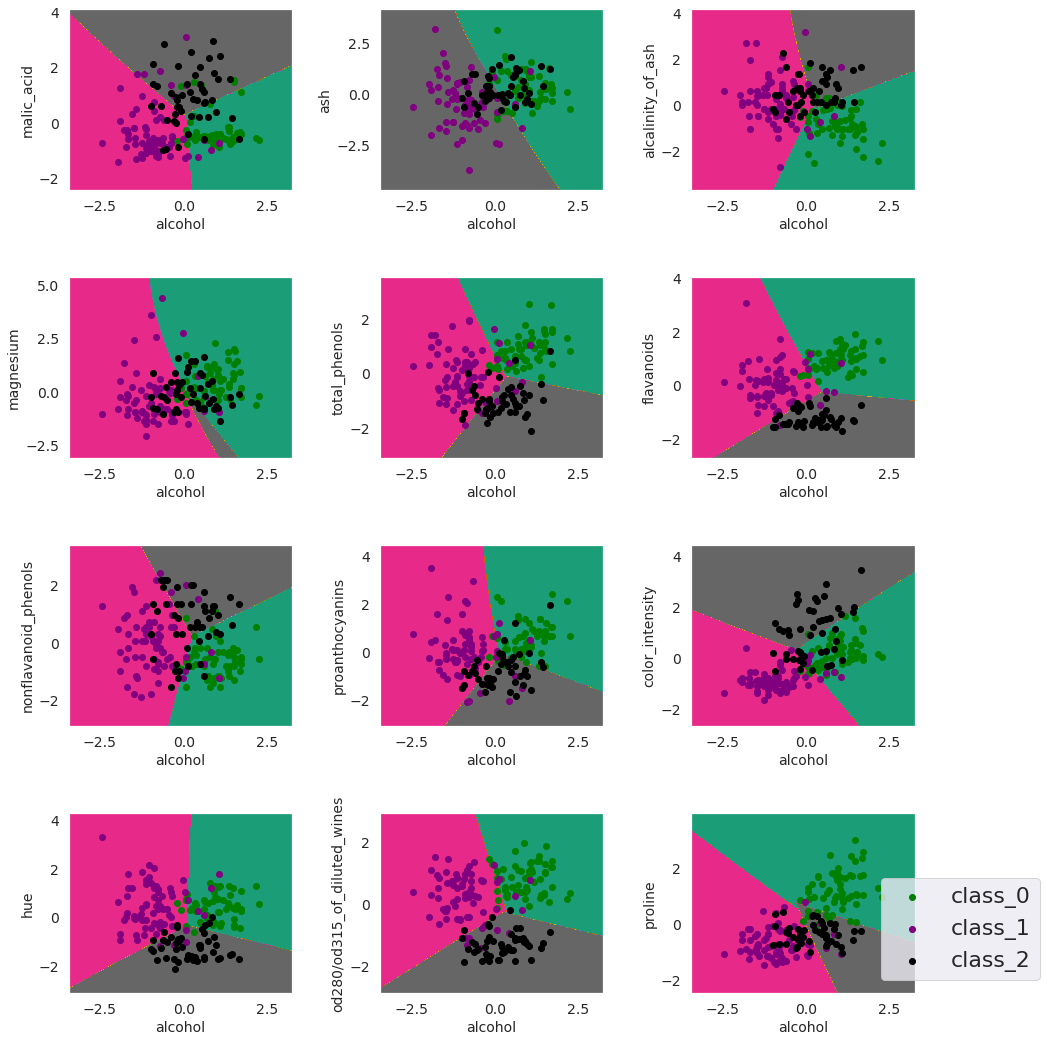

In [25]:
svc_mod = SVC(kernel = "rbf", gamma = 0.01, C = 1)

# Plot the decision boundary of the Naive Bayes Classifier

n_classes = 3
plot_colors = ["green", "purple", "black"] # Colours used to plot the points
plot_step = 0.02


ft_pairs = [[0,1], [0,2], [0,3], [0,4], [0,5], [0,6], [0,7], [0,8], [0,9], [0,10], [0,11], [0,12]]

fig = plt.figure(figsize = (15,15))

for pairidx, pair in enumerate(ft_pairs):

    X = wine_dtset.data[:, pair]
    y = wine_dtset.target
    
    X = StandardScaler().fit_transform(X)
    svc_mod.fit(X, y)
    

    plt.subplot(4, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

    Z = svc_mod.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Dark2)

    plt.xlabel(wine_dtset.feature_names[pair[0]], fontsize = 14)
    plt.ylabel(wine_dtset.feature_names[pair[1]], fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine_dtset.target_names[i])

    plt.axis("tight")

plt.legend(loc = "best", bbox_to_anchor=(0.8, 0.2, 0.6, 0.5))
plt.tight_layout()
plt.show()

In [26]:
# Not all the pairs of features yield an optimal classification accuracy
# Accuracy of the model trained using only ash and alcohol

svc_mod.fit(wine_dtset.data[:, [0,2]], wine_dtset.target)
print("Class. accuracy for ash and alcohol: {} %".format(100*round(svc_mod.score(wine_dtset.data[:, [0,2]], wine_dtset.target),2)))

Class. accuracy for ash and alcohol: 67.0 %


In [27]:
# Accuracy of the model trained using only flavanoids and alcohol

svc_mod.fit(wine_dtset.data[:, [0,6]], wine_dtset.target)
print("Class. accuracy for flavanoids and alcohol: {} %".format(100*round(svc_mod.score(wine_dtset.data[:, [0,6]], wine_dtset.target),2)))

Class. accuracy for flavanoids and alcohol: 93.0 %
